In [17]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
df = pd.read_csv('assignment2.csv')

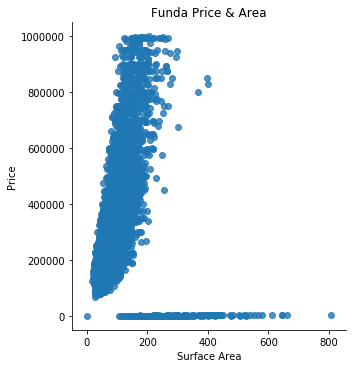

In [19]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Surface Area')
plt.ylabel('Price')
plt.title('Funda Price & Area')
plt.show()

In [20]:
def under_5000(x):
    if(x < 5000):
        return float('NaN')
    else:
        return x

df['price'] = df['price'].apply(under_5000)
df = df.dropna()


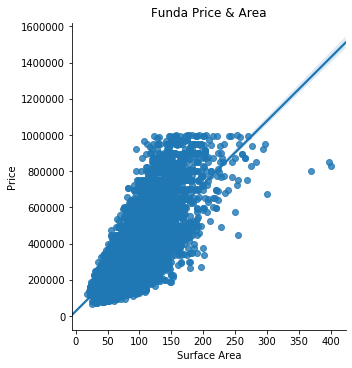

In [21]:
sns.lmplot(x='area', y='price', data=df)
plt.title('Funda Price & Area')
plt.xlabel("Surface Area")
plt.ylabel("Price")
plt.show()

In [22]:
x = df[['area']] #get the subscrivers
y = df['price'] #get the views
lm = LinearRegression() #create a new (empty model)
lm.fit(x, y) #fit the model

df['price_p'] = lm.predict(x) #generate the predictions and add them to the dataframe
df['resid'] = df['price'] - df['price_p'] #get the residuals by subtracting the prediction from the actual views

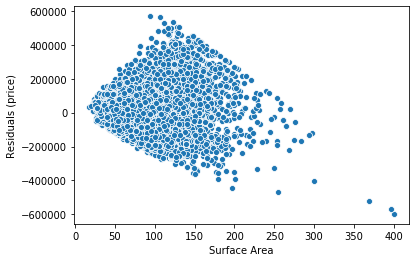

In [23]:
sns.scatterplot(x='area',y='resid',data=df)
plt.xlabel('Surface Area')
plt.ylabel('Residuals (price)')
plt.show()

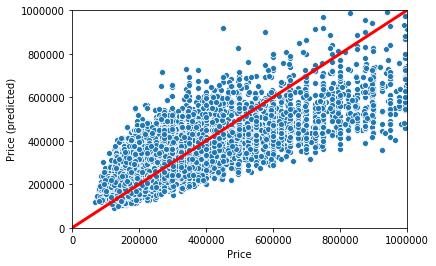

In [24]:
sns.scatterplot(x='price',y='price_p',data=df)
plt.xlim(0, 1000000) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 1000000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1000000], [0, 1000000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

In [25]:
r2_score(df['price'], df['price_p']) #this gives the model fit (R2) for the Y and predicted Y

0.5257421182315432

In [26]:
math.sqrt(mean_squared_error(df['price'], df['price_p'])) #this gives the model fit (R2) for the Y and predicted Y

118016.87861535022

The RMSE is 118000. Which means that we are typically about 118000 off in our predicted views.

For example, the predicted price is 900.000. It can be 118.000 on average under or above the predicted price of 900.000.  

EXERCISE 5 
Multiple linear regression


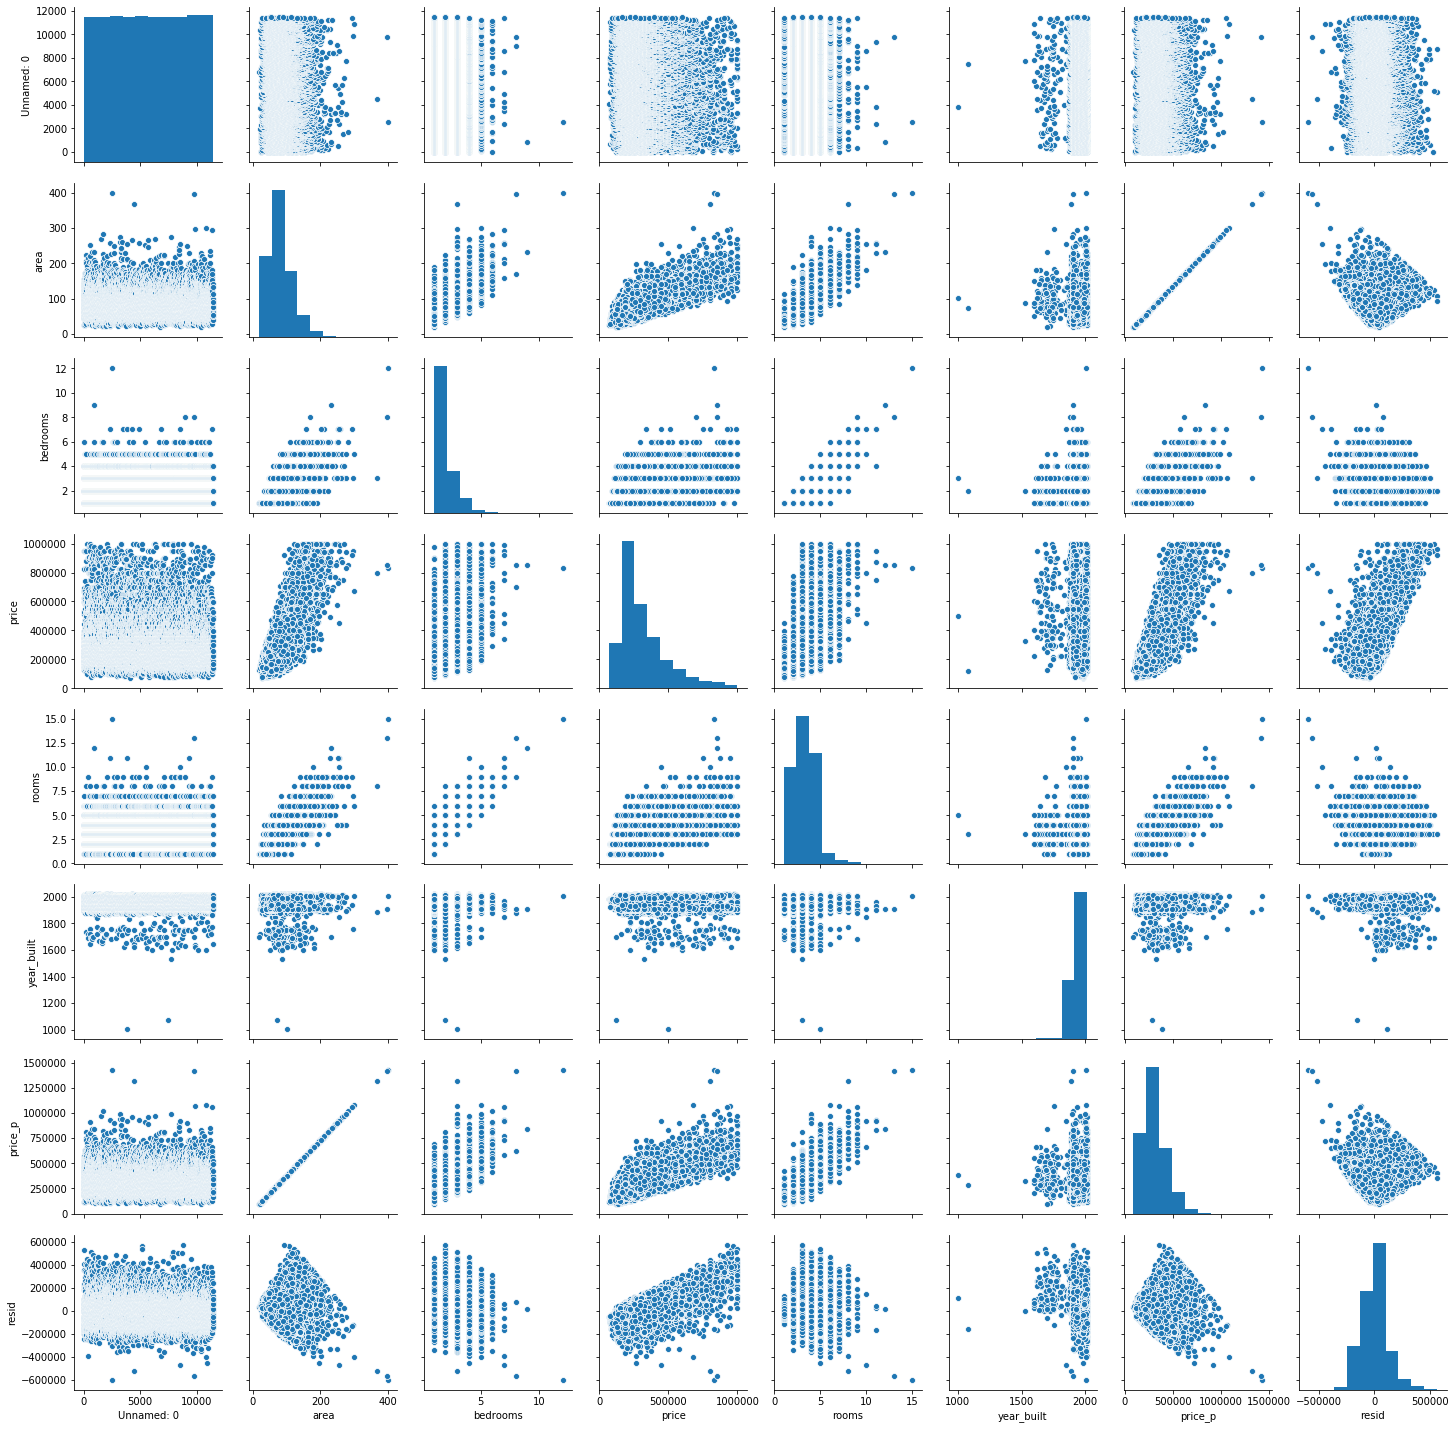

In [27]:
sns.pairplot(df)
plt.show()

In [34]:
y = df['price'] #We need to take out the rating as our Y-variable
X = df.loc[:,'area':'bedrooms'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.index = df['price'] #this stores the movie names in the column names, so we don't lose track of them later
X.head(10)

,area,bedrooms
price,,
510000.0,108,2
215000.0,47,1
325000.0,116,2
315000.0,58,2
200000.0,63,1
515000.0,125,2
200000.0,64,3
599000.0,155,3
249000.0,85,2


In [38]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head(10) #The train data

,area,bedrooms
price,,
139500.0,72,2
995000.0,148,3
518000.0,139,3
147500.0,28,1
269000.0,59,2
141701.0,63,1
299000.0,90,2
224500.0,72,2
599000.0,115,2


In [39]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [40]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
4204.725967,area
-34159.254575,bedrooms


In [41]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.5396590050207144

In [42]:
math.sqrt(mean_squared_error(y_test, y_test_p))

116847.04725254445

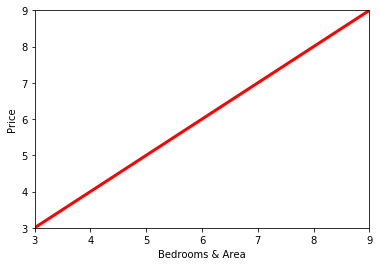

In [46]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Bedrooms & Area')
plt.ylabel('Price')
plt.xlim([3,9]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,9])
plt.plot([3, 9], [3, 9], color='red', lw=3) #Plot a diagonal length
plt.show()